In [3]:
from algorithms.sat_heuristic import Sat
from tools.generator import Generator
from tools.tokenizer import Tokenizer
import tools.files as files

In [66]:
expression = '(a or not b or c) and (not a or b or not c)'

gen = Generator(clause_count=160, literals_per_clause=3, variable_count=160, var_name='x')

expression = gen.generate()

tokenizer = Tokenizer(expression)
_, var_names = tokenizer.tokenize()
clauses = tokenizer.get_clauses()

#print('Expresion:', expression)

#print('\nClausulas:', clauses)
#print('\nVariables de la expresion:', var_names)

tokenizer.tokenize_clause(clauses[0])

['x131', 'x153', 'x82']

In [70]:
sat = Sat(var_names, clauses, individuals=30, mutation_p=0.15, crossover_p=0.6, generations=100)

results_sat, time = sat.sat_algorithm()

print('\nExecution time {} seconds'.format(time))

if sat.fitness(results_sat[0]) == 0:
        print('\nsolucion optima:\n')
else:
        print('\nMejor solucion encontrada:\n')

print(results_sat[0])

. Generation 0, Minimum Fitness = 10, time = 0.13865350000003218
. Generation 1, Minimum Fitness = 7, time = 0.26570030000004863
. Generation 2, Minimum Fitness = 7, time = 0.4276757999999745
. Generation 3, Minimum Fitness = 7, time = 0.5512691000000132
. Generation 4, Minimum Fitness = 7, time = 0.6882166999999981
. Generation 5, Minimum Fitness = 7, time = 0.8241696000000047
. Generation 6, Minimum Fitness = 6, time = 0.9760955000000422
. Generation 7, Minimum Fitness = 4, time = 1.096209300000055
. Generation 8, Minimum Fitness = 3, time = 1.2477698000000146
. Generation 9, Minimum Fitness = 3, time = 1.3885864000000083
. Generation 10, Minimum Fitness = 2, time = 1.5287604000000101
. Generation 11, Minimum Fitness = 2, time = 1.6579388999999765
. Generation 12, Minimum Fitness = 2, time = 1.7795545999999831
. Generation 13, Minimum Fitness = 2, time = 1.9171178999999938
. Generation 14, Minimum Fitness = 1, time = 2.064565600000037
. Generation 15, Minimum Fitness = 1, time = 2.18

In [16]:
files.reset_result("result_sat_heuristico")

for n in range(3, 20):

    gen = Generator(clause_count=n, literals_per_clause=3, variable_count=n, var_name='x')
    expression = gen.generate()

    tokenizer = Tokenizer(expression)
    _, var_names = tokenizer.tokenize()
    clauses = tokenizer.get_clauses()

    print('Evaluating {} variables...'.format(n))

    sat = Sat(var_names, clauses, individuals=30, mutation_p=0.15, crossover_p=0.6, generations=100)
    _, time = sat.sat_algorithm(verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result("result_sat_heuristico", result)

print("\nEnd!")

Evaluating 3 variables...
Evaluating 4 variables...
Evaluating 5 variables...
Evaluating 6 variables...
Evaluating 7 variables...
Evaluating 8 variables...
Evaluating 9 variables...
Evaluating 10 variables...
Evaluating 11 variables...
Evaluating 12 variables...
Evaluating 13 variables...
Evaluating 14 variables...
Evaluating 15 variables...
Evaluating 16 variables...
Evaluating 17 variables...
Evaluating 18 variables...
Evaluating 19 variables...

End!


In [17]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)

    plt.xlabel('Cantidad de variables')
    plt.ylabel('Ejecucion en segundos')

    plt.suptitle('Crecimiento del costo temporal')
    
    plt.savefig('tools/results/sat_heuristico.png', dpi=600)

    plt.show()

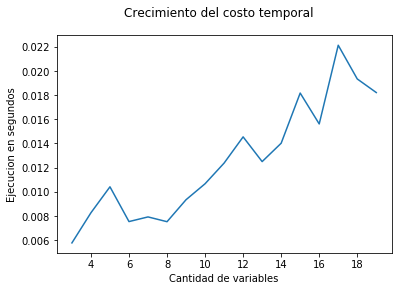

In [18]:
# Leo los resultados y los grafico

results = files.read_result("result_sat_heuristico")

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]))

plot_historic(nodes, times)